In [102]:
#Tabular Data Model Fitting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
df= pd.read_csv('train_model_fitting.csv')
test = pd.read_csv("test_model_fitting.csv")

df

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.500000,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.500000,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.500000,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.500000,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.500000,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,State_11,Commercial,Office_Uncategorized,20410.0,1995.0,8.0,36.6,28,43.451613,...,25,3,0,0,NaN,NaN,NaN,NaN,132.918411,75752
75753,6,State_11,Residential,5plus_Unit_Building,40489.0,1910.0,98.0,36.6,28,43.451613,...,25,3,0,0,NaN,NaN,NaN,NaN,39.483672,75753
75754,6,State_11,Commercial,Commercial_Other,28072.0,1917.0,NaN,36.6,26,36.612903,...,6,0,0,0,NaN,NaN,NaN,NaN,48.404398,75754
75755,6,State_11,Commercial,Commercial_Other,53575.0,2012.0,NaN,36.6,26,36.612903,...,6,0,0,0,NaN,NaN,NaN,NaN,592.022750,75755


### Understanding Data (Review)

* Understand distributions
* Trends
* Relationships
* Patterns

### Exploring the dataset

In [103]:
type(df)

pandas.core.frame.DataFrame

In [104]:
df.shape

(75757, 64)

In [105]:
df.nunique()

Year_Factor                      6
State_Factor                     7
building_class                   2
facility_type                   60
floor_area                   20433
                             ...  
direction_peak_wind_speed        8
max_wind_speed                  16
days_with_fog                   42
site_eui                     61080
id                           75757
Length: 64, dtype: int64

In [106]:
df.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


In [107]:
test.shape

(9705, 63)

In [108]:
df.isnull().sum()

Year_Factor                      0
State_Factor                     0
building_class                   0
facility_type                    0
floor_area                       0
                             ...  
direction_peak_wind_speed    41811
max_wind_speed               41082
days_with_fog                45796
site_eui                         0
id                               0
Length: 64, dtype: int64

In [109]:
test.isnull().sum()

Year_Factor                     0
State_Factor                    0
building_class                  0
facility_type                   0
floor_area                      0
                             ... 
direction_max_wind_speed     8575
direction_peak_wind_speed    8575
max_wind_speed               8575
days_with_fog                9117
id                              0
Length: 63, dtype: int64

In [110]:
df.corr()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
Year_Factor,1.000000,-0.036363,0.084143,-0.005052,0.132855,0.007913,-0.099628,-0.291137,-0.391312,-0.101799,...,0.185233,0.054718,-0.043701,-0.013635,0.231525,0.214651,0.233857,0.619227,-0.045179,0.534754
floor_area,-0.036363,1.000000,0.100878,0.034947,0.097797,-0.148467,-0.137654,-0.104118,-0.106110,-0.120068,...,0.049897,0.022583,-0.031415,-0.009205,-0.000018,-0.003984,-0.000922,0.014282,0.073967,-0.090856
year_built,0.084143,0.100878,1.000000,-0.073857,0.047803,-0.011210,-0.032846,-0.080230,-0.000619,-0.020201,...,-0.035519,-0.005065,-0.054164,NaN,0.001168,-0.009591,0.004945,0.084167,0.017162,0.053929
energy_star_rating,-0.005052,0.034947,-0.073857,1.000000,-0.016783,0.144452,0.149421,0.081703,0.126411,0.137479,...,-0.074993,0.019541,0.059382,NaN,-0.000992,0.002014,-0.000333,0.019387,-0.511012,-0.025448
ELEVATION,0.132855,0.097797,0.047803,-0.016783,1.000000,-0.255502,-0.233452,-0.345130,-0.153185,-0.184543,...,0.062014,0.184423,0.104934,0.077188,0.050804,0.074144,0.040172,0.495345,0.011798,-0.201664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
direction_peak_wind_speed,0.214651,-0.003984,-0.009591,0.002014,0.074144,-0.159938,-0.257252,-0.281605,-0.328404,-0.679818,...,0.467093,-0.027694,-0.026805,0.023397,0.999784,1.000000,0.992227,0.330064,0.013589,0.210752
max_wind_speed,0.233857,-0.000922,0.004945,-0.000333,0.040172,-0.162500,-0.271260,-0.302567,-0.349035,-0.694419,...,0.491481,-0.025128,-0.019491,0.018086,0.988797,0.992227,1.000000,0.353990,0.010639,0.218777
days_with_fog,0.619227,0.014282,0.084167,0.019387,0.495345,-0.035741,-0.108595,-0.321699,-0.286155,-0.173583,...,0.084892,0.048981,-0.207379,NaN,0.330441,0.330064,0.353990,1.000000,-0.055388,0.301534
site_eui,-0.045179,0.073967,0.017162,-0.511012,0.011798,-0.179190,-0.167982,-0.097070,-0.147348,-0.154071,...,0.086347,-0.007980,-0.050029,-0.014190,0.010217,0.013589,0.010639,-0.055388,1.000000,-0.026500


## Visualiazations

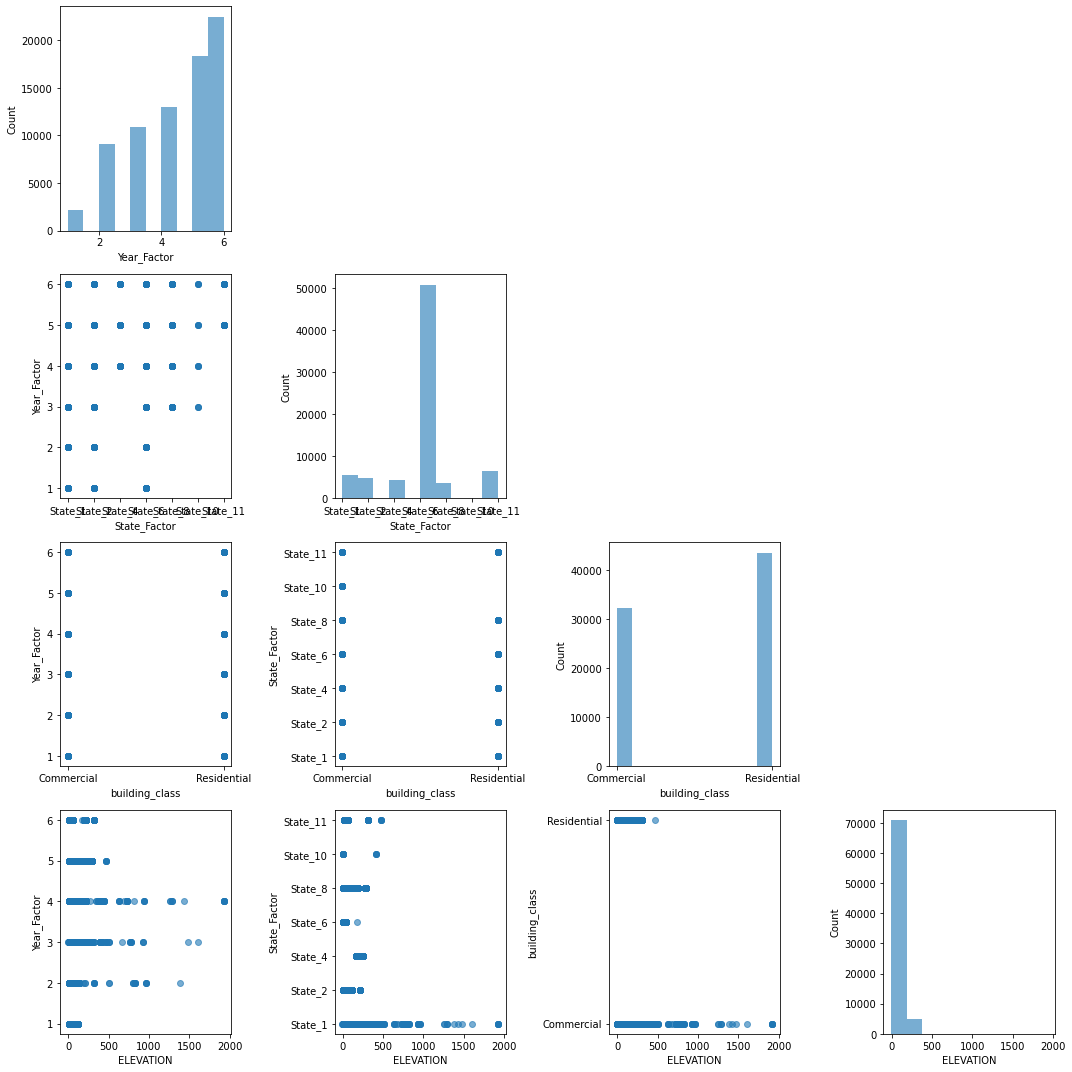

In [111]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
cols=['Year_Factor', 'State_Factor', 'building_class', 'ELEVATION']
scatterplotmatrix(df[cols].values, figsize=(15,15), names=cols, alpha=0.6)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='id', ylabel='floor_area'>

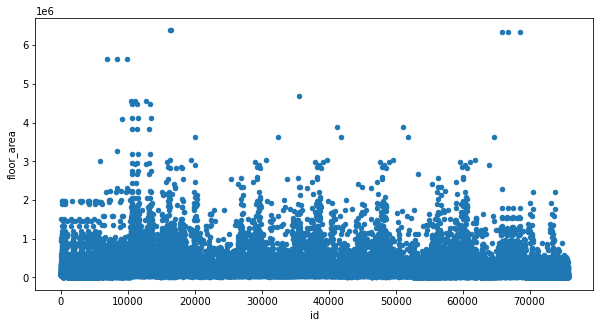

In [112]:
df.plot.scatter('id', 'floor_area', figsize=(10,5))

<AxesSubplot:xlabel='year_built', ylabel='building_class'>

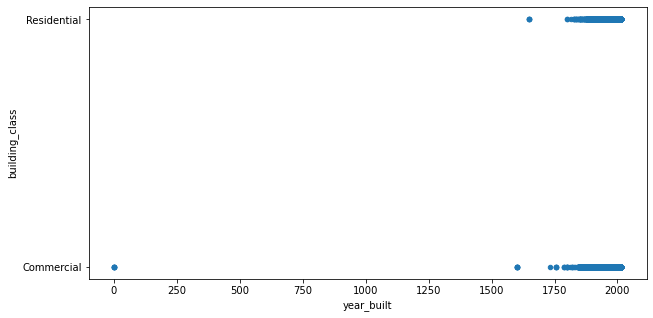

In [113]:
df.plot.scatter('year_built', 'building_class', figsize=(10,5))

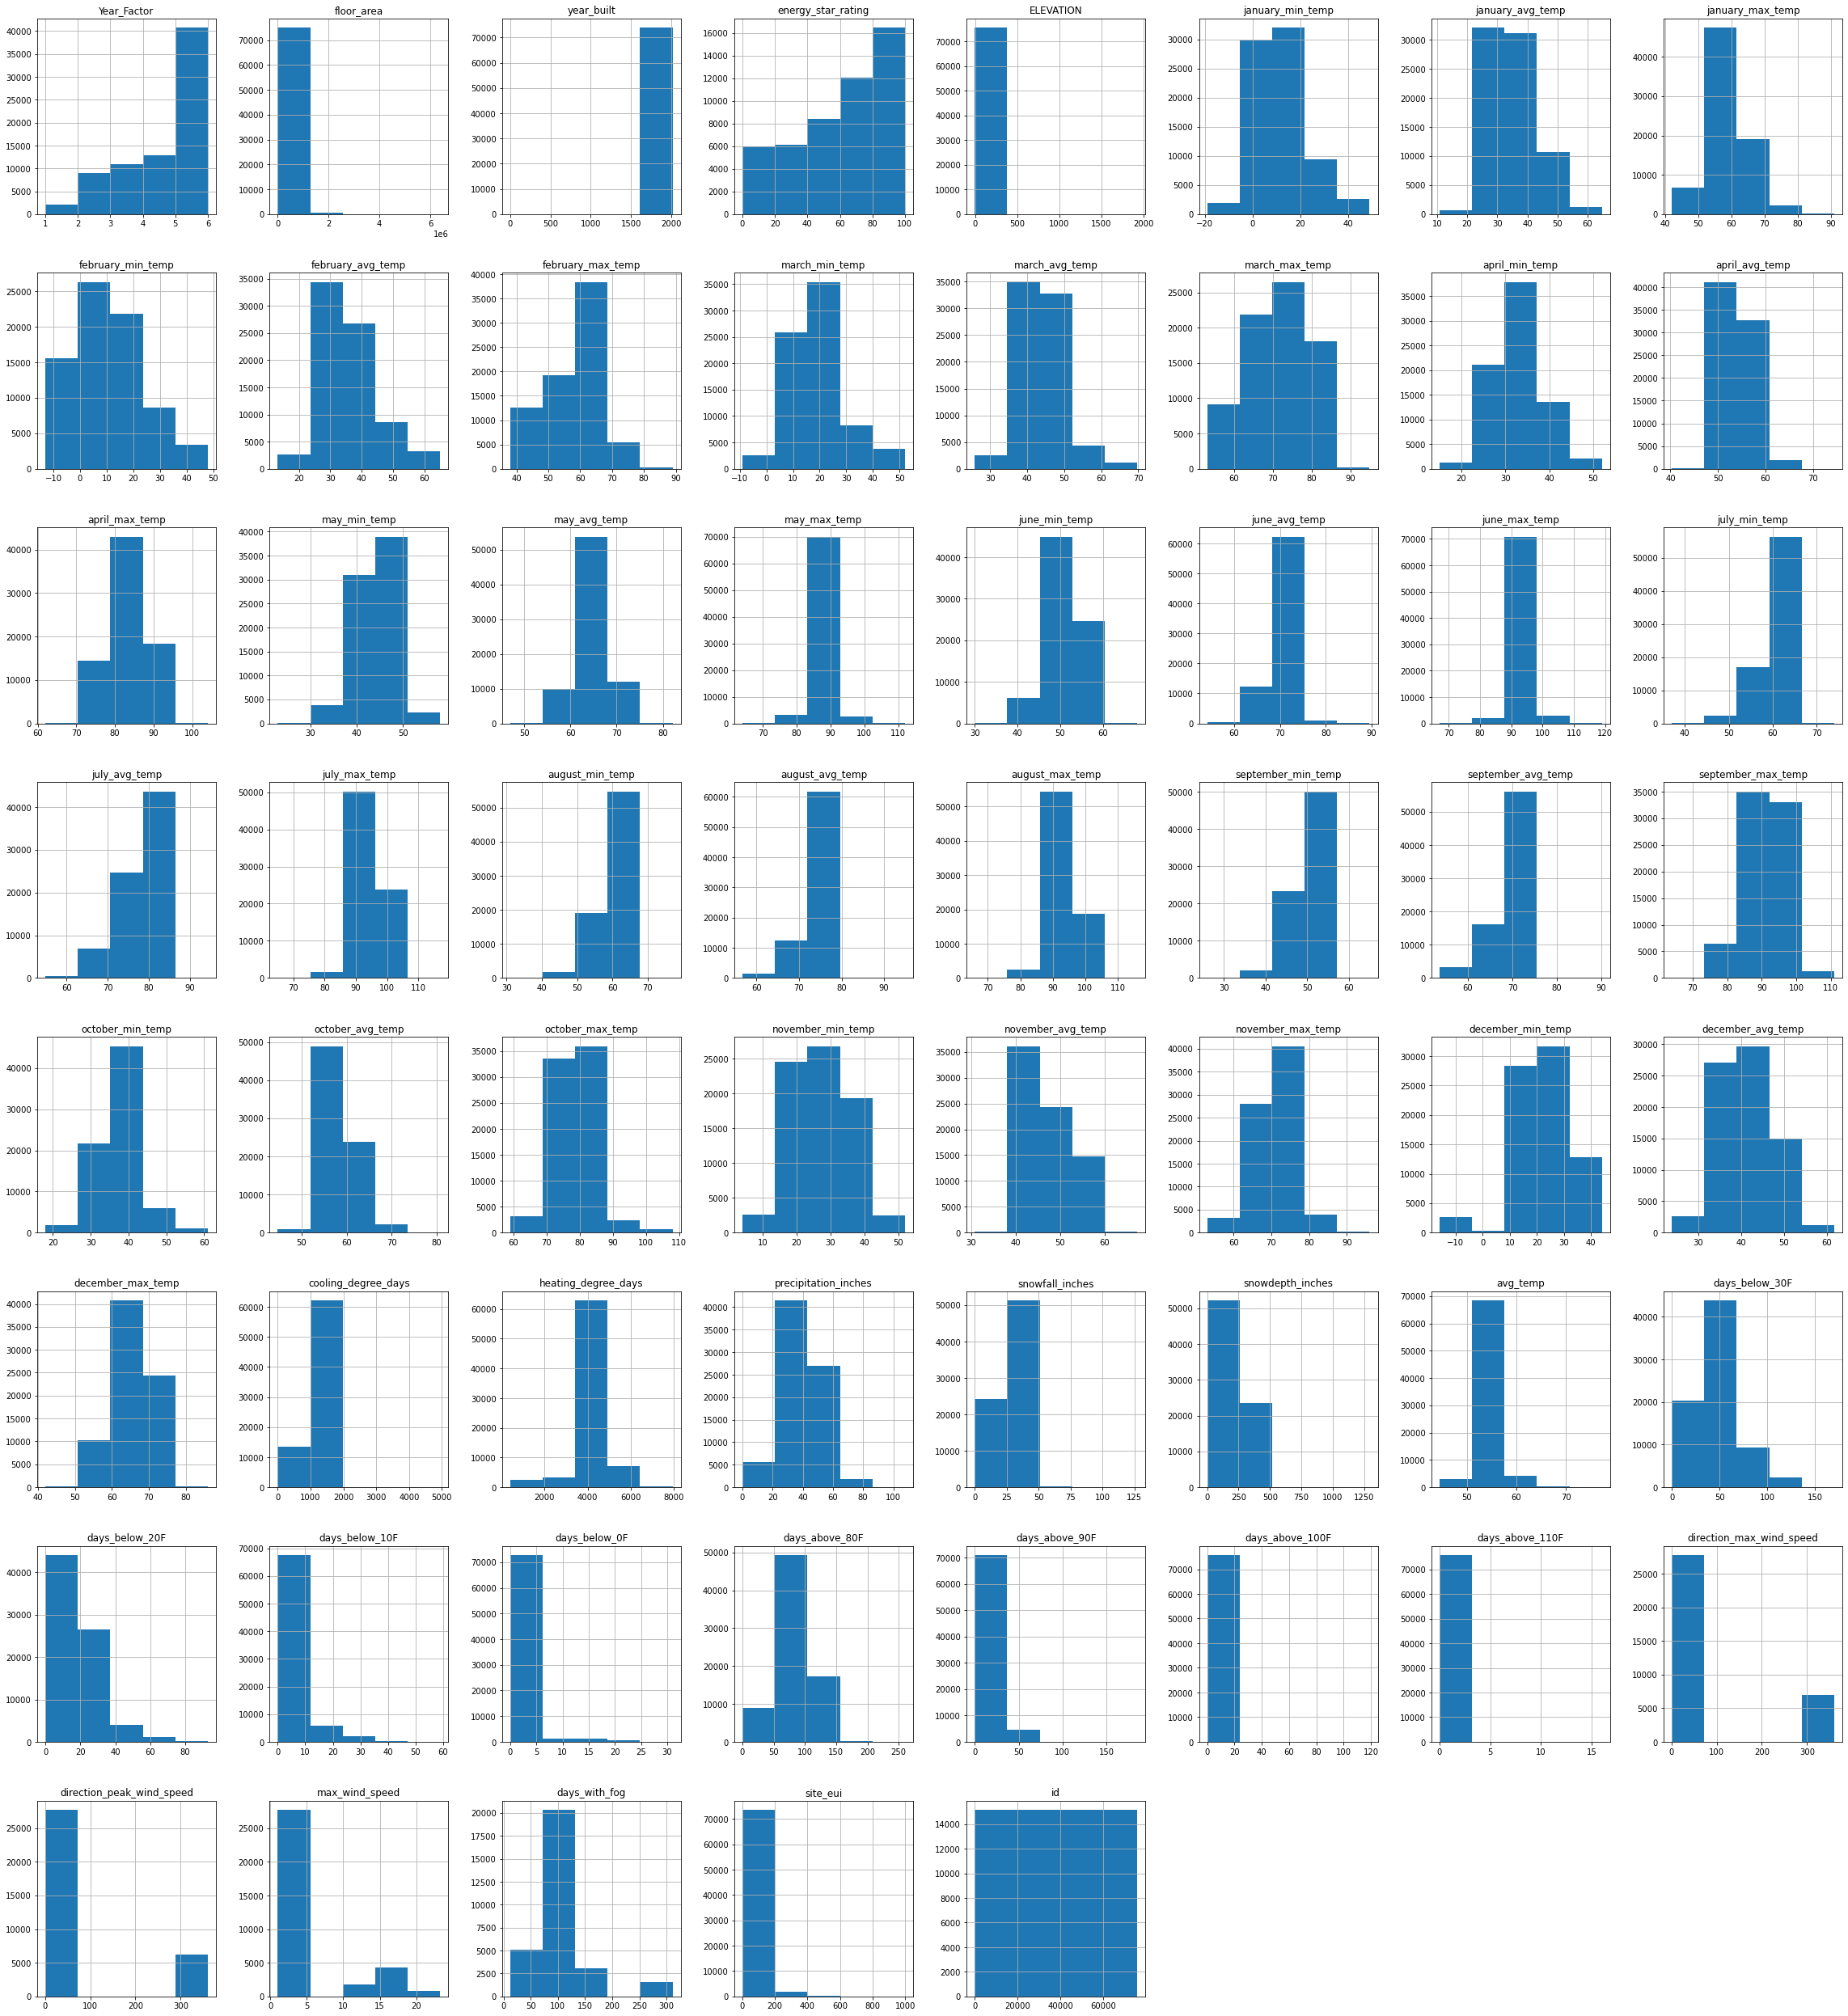

In [114]:
hist = df.hist(bins=5, figsize=(40,45))

<AxesSubplot:xlabel='year_built'>

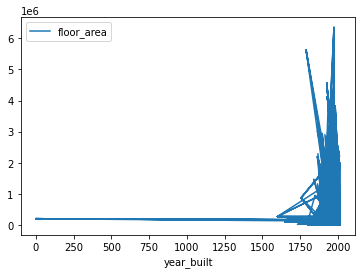

In [115]:
df.plot(x="year_built", y="floor_area") 

<AxesSubplot:xlabel='building_class', ylabel='facility_type'>

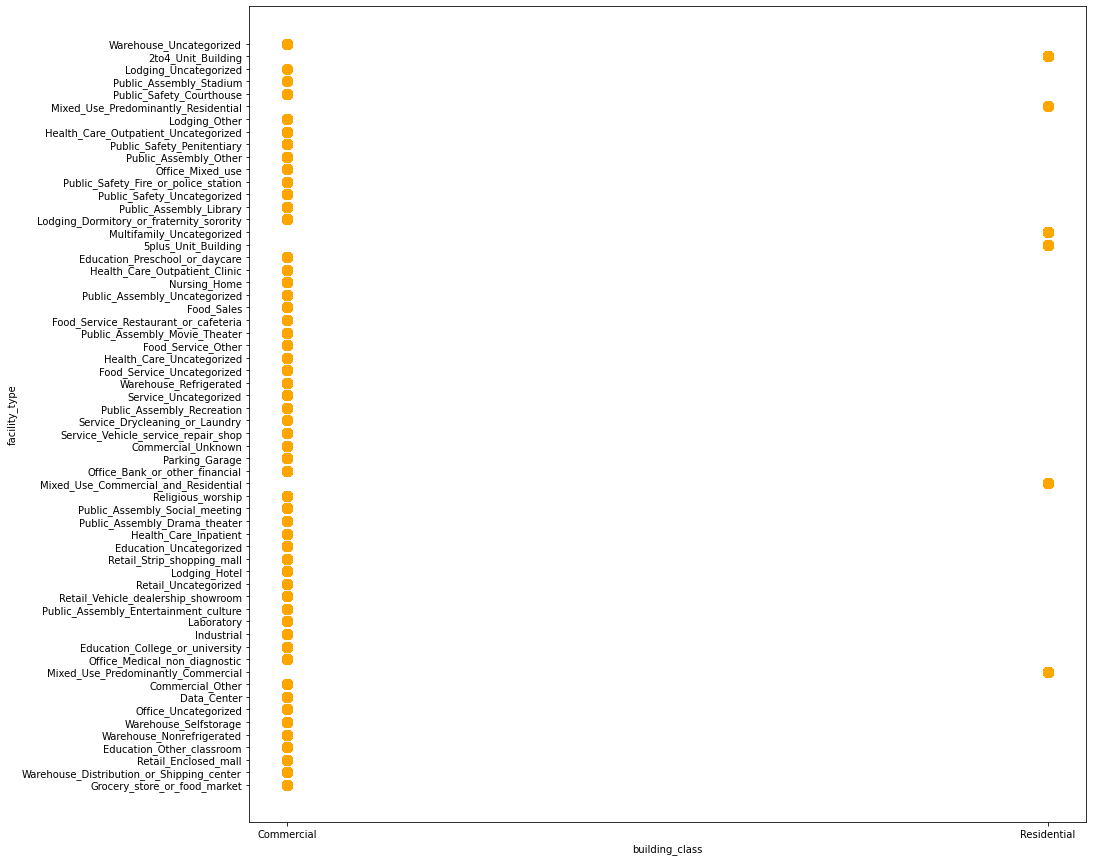

In [116]:
ax=df.plot.scatter(x="year_built", y="floor_area", color="red", marker="*", s=100)
df.plot.scatter(x="building_class", y="facility_type", color="orange", s=100, ax=ax, figsize=(15,15))

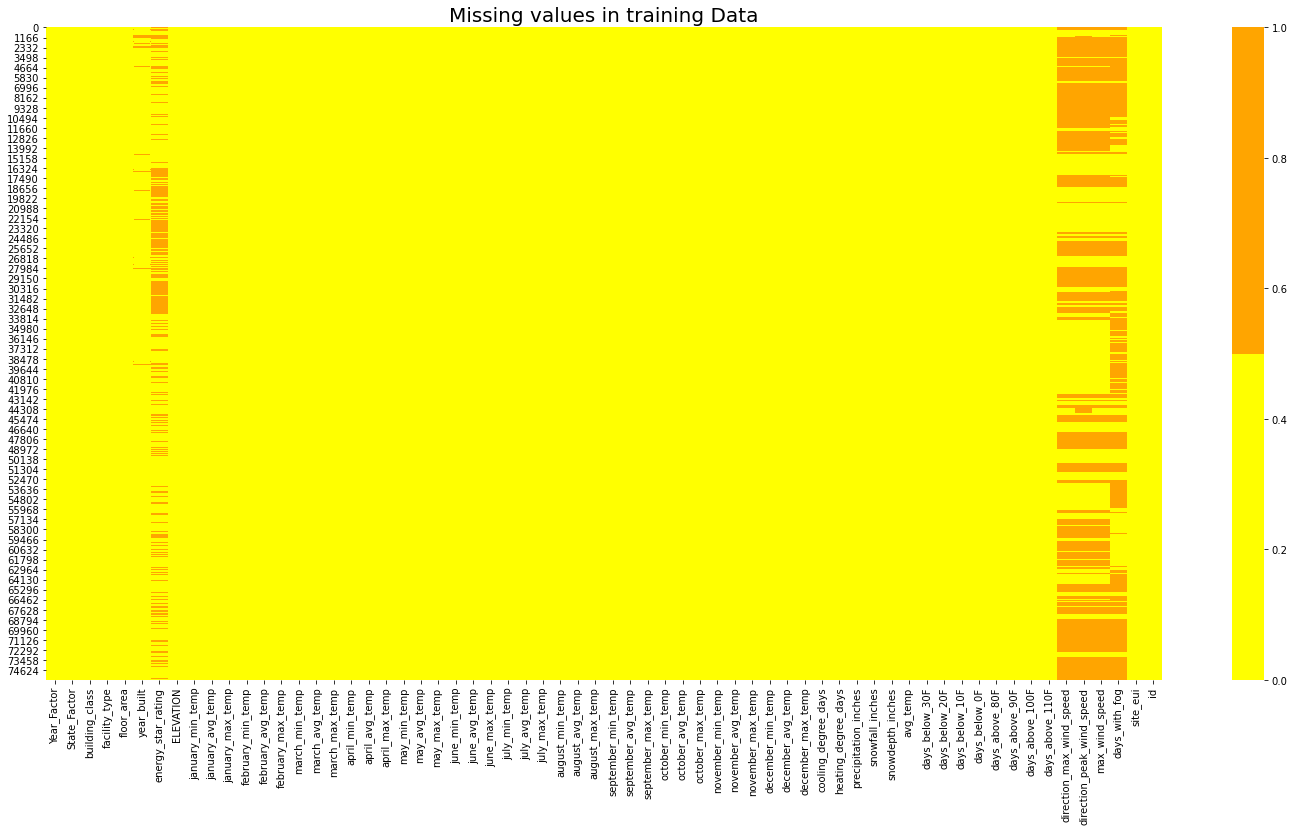

In [117]:
plt.figure(figsize = (25,12))
sns.heatmap(df.isna().values, cmap = ['yellow','orange'], xticklabels=df.columns)
plt.title("Missing values in training Data", size=20);

The above colums marked in orange has null values.

Since there are many null values in few columns we will drop those and impute the rest.

In [118]:
df = df.drop('days_with_fog', 1)
df = df.drop('max_wind_speed', 1)
df = df.drop('direction_peak_wind_speed', 1)
df = df.drop('direction_max_wind_speed', 1)


In [119]:
test = test.drop('days_with_fog', 1)
test = test.drop('max_wind_speed', 1)
test = test.drop('direction_peak_wind_speed', 1)
test = test.drop('direction_max_wind_speed', 1)

In [120]:
group_by_year = df.groupby(['year_built'])
group_by_year.size()

year_built
0.0         6
1600.0      6
1649.0      4
1732.0      1
1756.0      4
         ... 
2011.0    279
2012.0    353
2013.0    398
2014.0    269
2015.0    111
Length: 180, dtype: int64

/Users/vinay/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='energy_star_rating'>

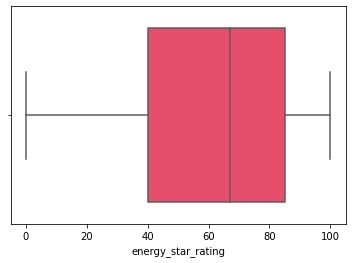

In [121]:
#check for outliers in energy_star_rating and year_built
sns.boxplot(df.energy_star_rating , color = "#ff355d")


/Users/vinay/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='year_built'>

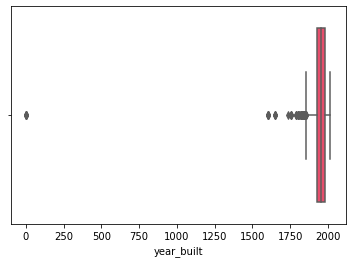

In [122]:
sns.boxplot(df.year_built , color = "#ff355d")

/Users/vinay/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='year_built'>

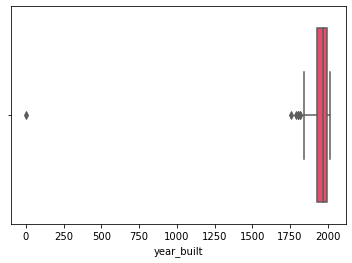

In [123]:
sns.boxplot(test.year_built , color = "#ff355d")

/Users/vinay/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='energy_star_rating'>

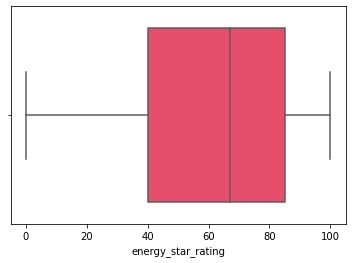

In [124]:
sns.boxplot(df.energy_star_rating , color = "#ff355d")

In [125]:
#imputing values
df['energy_star_rating'] = df['energy_star_rating'].replace(np.nan, df['energy_star_rating'].mean())
df['year_built'] = df['year_built'].replace(np.nan, df['energy_star_rating'].median())

In [126]:
#imputing values
test['energy_star_rating'] = test['energy_star_rating'].replace(np.nan, df['energy_star_rating'].mean())
test['year_built'] = test['year_built'].replace(np.nan, df['energy_star_rating'].median())

In [127]:
df = df.drop_duplicates()
df.shape

(75757, 60)

In [128]:
sum(df['year_built'].isnull()==True)

0

In [129]:
type(df['site_eui'][2])

numpy.float64

/Users/vinay/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='site_eui'>

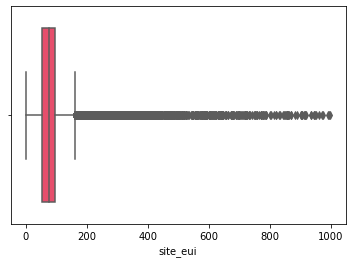

In [130]:
sns.boxplot(df.site_eui , color = "#ff355d")

In [131]:
from scipy import stats
# which year factor occurs most frequently in the dataset
most_freq_year, count = stats.mode(df['Year_Factor'])

year_mode = int(most_freq_year) 
print(year_mode)

6


The year_factor 6 is the most commonly occuring ones.

<AxesSubplot:>

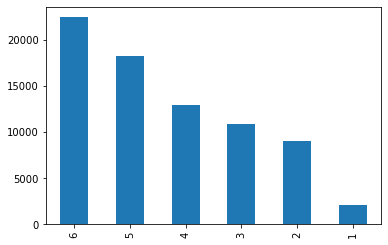

In [132]:
#Bar plot dipicting the frequency for each year_factor
df.Year_Factor.value_counts().plot.bar()


<AxesSubplot:>

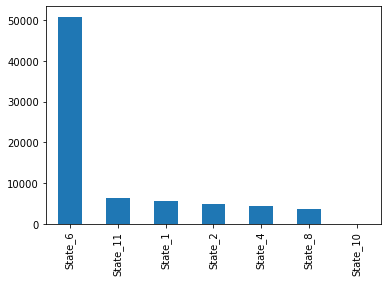

In [133]:
#Bar plot dipicting the frequency for each state_factor

df.State_Factor.value_counts().plot.bar()


Here State_6 has the maximum frequecy.

<AxesSubplot:xlabel='Year_Factor', ylabel='site_eui'>

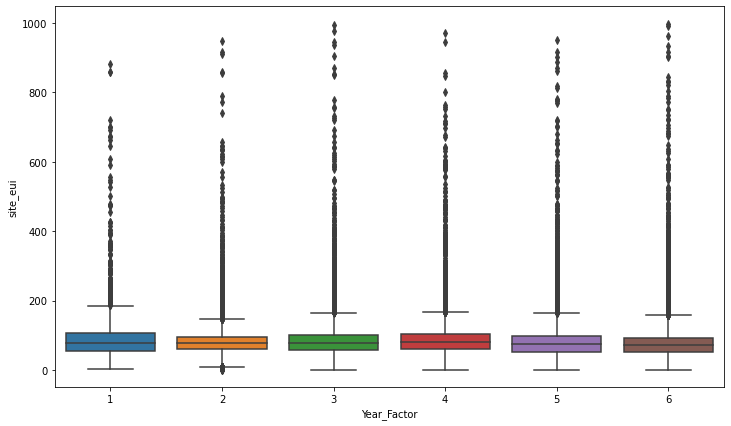

In [134]:
fig = plt.figure(figsize=(12,7))
sns.boxplot(x="Year_Factor", y="site_eui", data=df)

In [135]:
group_by_year = df.groupby(['State_Factor'])
group_by_year.size()

State_Factor
State_1      5618
State_10       15
State_11     6412
State_2      4871
State_4      4300
State_6     50840
State_8      3701
dtype: int64

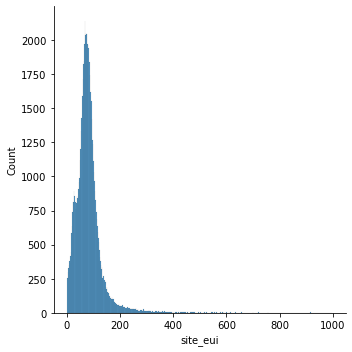

In [136]:
sns.displot(df['site_eui']);

In [137]:
import plotly.express as px
df_res = df[df['building_class'] == 'Residential']
df_res_group = df_res.groupby("facility_type")['site_eui'].agg('median').reset_index().sort_values(by ='site_eui', ascending = False)
fig = px.bar(df_res_group, x="facility_type", y="site_eui")
fig.update_layout(title_text='Residential facilities that have high site_eui', title_x=0.5, title_y=1, margin=dict(t=30, l=30, r=30, b=30))
fig.show()

In [138]:
df_res = df[df['building_class'] == 'Commercial']
df_res_group = df_res.groupby("facility_type")['site_eui'].agg('median').reset_index().sort_values(by ='site_eui', ascending = False)
fig = px.bar(df_res_group, x="facility_type", y="site_eui")
fig.update_layout(title_text='Residential facilities that have high site_eui', title_x=0.5, title_y=1, margin=dict(t=30, l=30, r=30, b=30))
fig.show()

In [139]:
group_by_FT = df.groupby(['facility_type'])
group_by_FT.size()

facility_type
2to4_Unit_Building                            1893
5plus_Unit_Building                           1273
Commercial_Other                              1744
Commercial_Unknown                              95
Data_Center                                     27
Education_College_or_university               1056
Education_Other_classroom                     3860
Education_Preschool_or_daycare                 108
Education_Uncategorized                        709
Food_Sales                                      70
Food_Service_Other                              17
Food_Service_Restaurant_or_cafeteria            64
Food_Service_Uncategorized                      18
Grocery_store_or_food_market                   448
Health_Care_Inpatient                          409
Health_Care_Outpatient_Clinic                   56
Health_Care_Outpatient_Uncategorized            36
Health_Care_Uncategorized                       51
Industrial                                     384
Laboratory       

<AxesSubplot:>

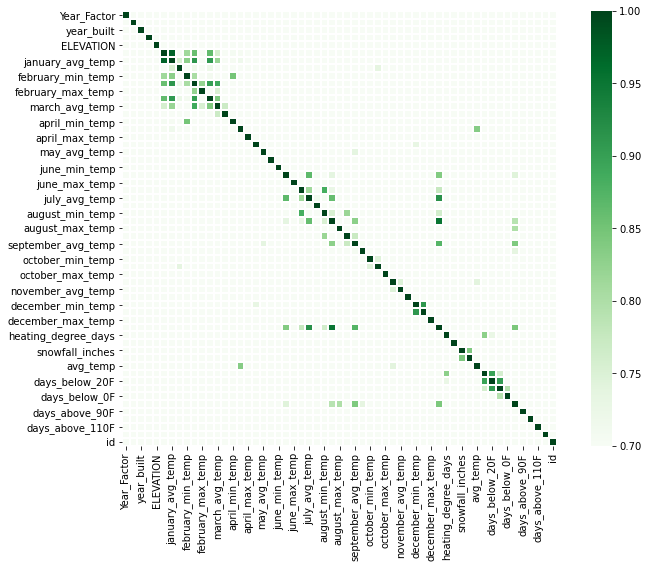

In [140]:
import seaborn as sns
from matplotlib import pyplot as plt

#correlation matrix
corr = df.corr()

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.heatmap(corr, vmin=0.7, vmax=1, linewidths=1,square=True,cmap='Greens')

In [141]:
#Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['State_Factor', 'building_class', 'facility_type']


This shows correlation between the mentioned features.
We can see that days_below_20F is related to heating_degree_days and snowdepth_inches.

In [142]:
#Converting building_class to binary
d = {'Commercial': 1, 'Residential': 0}
df['building_class'] = df['building_class'].map(d)

In [143]:
#Converting building_class to binary
d = {'Commercial': 1, 'Residential': 0}
test['building_class'] = test['building_class'].map(d)

In [144]:
group_by_buildingClass = df.groupby(['building_class'])
group_by_buildingClass.size()

building_class
0    43558
1    32199
dtype: int64

In [145]:
#Converting facility_type to numeric
le= LabelEncoder()
df['facility_type'] = le.fit_transform(df['facility_type'].astype('str'))
test['facility_type'] = le.fit_transform(test['facility_type'].astype('str'))


In [146]:
group_by_SF = df.groupby(['State_Factor'])
group_by_SF.size()

State_Factor
State_1      5618
State_10       15
State_11     6412
State_2      4871
State_4      4300
State_6     50840
State_8      3701
dtype: int64

In [147]:
#Converting State_Factor to numeric
df['State_Factor'] = le.fit_transform(df['State_Factor'].astype('str'))
test['State_Factor'] = le.fit_transform(test['State_Factor'].astype('str'))


In [148]:
df['year_built'] = df['year_built'].astype(int)
test['year_built'] = test['year_built'].astype(int)

In [149]:
#Removed unimportant features which have corr value greater than 0.9
corr1 = df.corr()
columns = np.full((corr1.shape[0],), True, dtype=bool)


col_names=[]
for i in range(corr1.shape[0]):
    for j in range(i+1, corr1.shape[0]):
        if corr1.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

      
selected_columns = df.columns[columns]
df1 = df[selected_columns]
selected_columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_max_temp', 'february_min_temp',
       'february_max_temp', 'march_avg_temp', 'march_max_temp',
       'april_min_temp', 'april_avg_temp', 'april_max_temp', 'may_min_temp',
       'may_avg_temp', 'may_max_temp', 'june_min_temp', 'june_avg_temp',
       'june_max_temp', 'july_min_temp', 'july_avg_temp', 'july_max_temp',
       'august_min_temp', 'august_avg_temp', 'august_max_temp',
       'september_min_temp', 'september_avg_temp', 'september_max_temp',
       'october_min_temp', 'october_avg_temp', 'october_max_temp',
       'november_min_temp', 'november_avg_temp', 'november_max_temp',
       'december_min_temp', 'december_max_temp', 'heating_degree_days',
       'precipitation_inches', 'snowfall_inches', 'snowdepth_inches',
       'avg_temp', 'days_below_30F', 'days_below_20F', 'days_below_0F',
       'days

In [150]:
df.describe()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui,id
count,75757.000000,75757.000000,75757.000000,75757.000000,7.575700e+04,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000
mean,4.367755,4.237998,0.425030,25.931914,1.659839e+05,1906.445253,61.048605,39.506323,11.432343,34.310468,...,48.756511,17.447932,4.886532,0.876764,82.709809,14.058701,0.279539,0.002442,82.584693,37878.000000
std,1.471441,1.549536,0.494351,11.645404,2.468758e+05,293.216138,23.063738,60.656596,9.381027,6.996108,...,27.587124,14.469435,7.071221,2.894244,25.282913,10.943996,2.252323,0.142140,58.255403,21869.306509
min,1.000000,0.000000,0.000000,0.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.001169,0.000000
25%,3.000000,4.000000,0.000000,27.000000,6.237900e+04,1926.000000,56.000000,11.900000,6.000000,29.827586,...,22.000000,5.000000,0.000000,0.000000,72.000000,6.000000,0.000000,0.000000,54.528601,18939.000000
50%,5.000000,5.000000,0.000000,27.000000,9.136700e+04,1950.000000,61.048605,25.000000,11.000000,34.451613,...,50.000000,11.000000,2.000000,0.000000,84.000000,12.000000,0.000000,0.000000,75.293716,37878.000000
75%,6.000000,5.000000,1.000000,30.000000,1.660000e+05,1976.000000,76.000000,42.700000,13.000000,37.322581,...,66.000000,26.000000,7.000000,0.000000,97.000000,17.000000,0.000000,0.000000,97.277534,56817.000000
max,6.000000,6.000000,1.000000,59.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,...,170.000000,93.000000,59.000000,31.000000,260.000000,185.000000,119.000000,16.000000,997.866120,75756.000000


In [151]:
#Removed unimportant features which have corr value greater than 0.9
corr1 = test.corr()
columns = np.full((corr1.shape[0],), True, dtype=bool)


col_names=[]
for i in range(corr1.shape[0]):
    for j in range(i+1, corr1.shape[0]):
        if corr1.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

      
selected_columns = test.columns[columns]
test1 = test[selected_columns]
selected_columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_max_temp', 'february_max_temp',
       'march_max_temp', 'june_min_temp', 'august_avg_temp', 'august_max_temp',
       'september_max_temp', 'october_max_temp', 'november_max_temp',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'days_below_30F', 'days_below_0F',
       'days_above_100F', 'days_above_110F', 'id'],
      dtype='object')

In [152]:
group_by_ = df.groupby(['building_class','State_Factor'])
group_by_.size()

building_class  State_Factor
0               0                 268
                2                3416
                3                1802
                4                1666
                5               36021
                6                 385
1               0                5350
                1                  15
                2                2996
                3                3069
                4                2634
                5               14819
                6                3316
dtype: int64

In [153]:
df['year_built'] = df['year_built'].astype(int)

In [154]:
group_by_ = df.groupby(['building_class','year_built'])
group_by_.size()

building_class  year_built
0               61            408
                1649            4
                1800            2
                1815            1
                1827            4
                             ... 
1               2011          114
                2012          157
                2013          185
                2014           97
                2015           43
Length: 327, dtype: int64

<AxesSubplot:xlabel='State_Factor', ylabel='site_eui'>

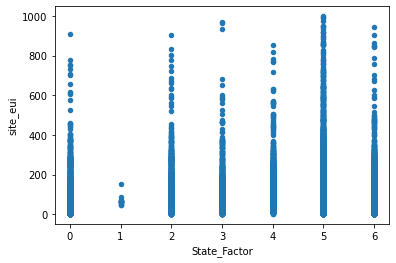

In [155]:
df.plot.scatter(x="State_Factor", y="site_eui")

array([[<AxesSubplot:title={'center':'days_below_20F'}>]], dtype=object)

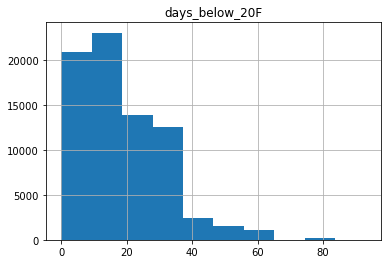

In [156]:
df[["days_below_20F"]].hist()

So,most of the places have around 15-20days below 20F

In [157]:
group_by_ = df.groupby(['days_below_0F'])
group_by_.size()

days_below_0F
0     57405
1     13131
2         2
3         2
4        20
5         1
6      2122
7       250
8       844
12      290
15     1076
17       99
19      191
20       95
21      186
22        2
25       15
29        1
31       25
dtype: int64

In [158]:
df=df.dropna()

# **Model's to predict building energy consumption**

In [159]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import accuracy_score

import numpy as np

In [160]:
mean_site_ui = np.mean(df['site_eui'])
mean_site_ui

82.58469263622104

In [161]:
med_site_ui = np.median(df['site_eui'])
med_site_ui

75.29371585

In [162]:
X = pd.DataFrame(df1)
Y = df1[['site_eui']]
x_test=pd.DataFrame(test1)

X_train, X_cv, y_train, y_cv = train_test_split(X, Y, test_size=0.2)

In [163]:
model1 = LinearRegression().fit(X_train,y_train)
Y_pred1=model1.predict(X_cv)

In [ ]:

y_pred = model.predict(test_model_fitting.csv)

In [164]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('mean_sqrd_error is==',mean_squared_error(y_cv,Y_pred1))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_cv,Y_pred1)))

mean_sqrd_error is== 2.6913365132222145e-24
root_mean_squared error of is== 1.6405293393360006e-12


Linear regression accuracy without standarization is too low

In [165]:
s_s2 = StandardScaler()
X_train_scaled = s_s2.fit_transform(X_train)
X_cv_scaled = s_s2.fit_transform(X_cv)
y_train_scaled = s_s2.fit_transform(y_train)
y_cv_scaled = s_s2.fit_transform(y_cv)

model2 = LinearRegression().fit(X_train_scaled,y_train_scaled)
Y_pred=model2.predict(X_cv_scaled)

In [166]:
# predicting the accuracy score
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_cv,Y_pred)))

root_mean_squared error of is== 98.67047240955819


The rmse is high here. So,we will regularize it

In [167]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=1.0)

lasso.fit(X_train_scaled,y_train_scaled)
pred=lasso.predict(X_cv_scaled)
mse=mean_squared_error(y_cv_scaled,pred)
#ridgeReg.score(y_test_scaled,pred)
print('root_mean_squared error of is==',np.sqrt(mse))

root_mean_squared error of is== 0.9999999999999998


Random Forest

In [168]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train_scaled,y_train_scaled)

<ipython-input-168-e8daae567633>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor()

In [169]:
pred = rf.predict(X_cv_scaled)
mse=mean_squared_error(y_cv_scaled,pred)
#ridgeReg.score(y_test_scaled,pred)
print('root_mean_squared error of is==',np.sqrt(mse))

root_mean_squared error of is== 0.00986061742121598


Decision Tree Regression Model

In [170]:

from sklearn.tree import DecisionTreeRegressor

reg=DecisionTreeRegressor(criterion="mse",
                         max_depth=10,
                         min_samples_split=10,
                         random_state=5)

reg.fit(X_train_scaled,y_train_scaled)

DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=5)

In [171]:
pred = reg.predict(X_cv_scaled)
mse=mean_squared_error(y_cv_scaled,pred)
#ridgeReg.score(y_test_scaled,pred)
print('root_mean_squared error of is==',np.sqrt(mse))

root_mean_squared error of is== 0.012625666144255305


In [172]:
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=0.01)

ridgeReg.fit(X_train_scaled,y_train_scaled)

pred = ridgeReg.predict(X_cv_scaled)
mse=mean_squared_error(y_cv_scaled,pred)
#ridgeReg.score(y_test_scaled,pred)
print('root_mean_squared error of is==',np.sqrt(mse))

root_mean_squared error of is== 1.8222731986844382e-07


The rmse value is lower.

In [173]:
from sklearn.ensemble import RandomForestRegressor

In [174]:
model = RandomForestRegressor(n_estimators = 100, min_samples_split = 2, min_samples_leaf= 1,
                              max_features = 'auto', max_depth= 90, bootstrap=True)

In [175]:
model.fit(X_train, y_train)
y_pred3 = model.predict(X_cv)
print(y_pred3)

<ipython-input-175-47a8900363e3>:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[ 76.19109826  59.68928299 127.93885934 ...  81.63382253  80.18884417
  75.77786931]


In [176]:

print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_cv,y_pred3)))

root_mean_squared error of is== 0.18294957302176812


XGBoost

In [177]:
from numpy import loadtxt
from xgboost import XGBRegressor


# fit model no training data
...
# create an xgboost regression model
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_cv)


In [179]:
# accuracy score

print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_cv,y_pred)))

root_mean_squared error of is== 0.8328844785578831


We have Random FOrest regressor and XGBoost Regressor which performs well.

# Deep Learning Model

In [181]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten



We have define a sequential model with few dense layers and used ‘relu’ as the activation function for the hidden layers and ‘normal’ initializer as the kernal_intializer.

We will use mean_absolute_error as a loss function Using ‘linear’ as activation function for the output layer.

In [182]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               7040      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 171,905
Trainable params: 171,905
Non-trainable params: 0
_________________________________________________________________


In [185]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [186]:
NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)


Epoch 1/500
1504/1516 [============================>.] - ETA: 0s - loss: 40.1281 - mean_absolute_error: 40.1281
Epoch 1: val_loss improved from inf to 28.00940, saving model to Weights-001--28.00940.hdf5
1516/1516 [==============================] - 6s 4ms/step - loss: 40.0180 - mean_absolute_error: 40.0180 - val_loss: 28.0094 - val_mean_absolute_error: 28.0094
Epoch 2/500
1510/1516 [============================>.] - ETA: 0s - loss: 17.8213 - mean_absolute_error: 17.8213
Epoch 2: val_loss improved from 28.00940 to 16.07651, saving model to Weights-002--16.07651.hdf5
1516/1516 [==============================] - 6s 4ms/step - loss: 17.7977 - mean_absolute_error: 17.7977 - val_loss: 16.0765 - val_mean_absolute_error: 16.0765
Epoch 3/500
1507/1516 [============================>.] - ETA: 0s - loss: 11.1145 - mean_absolute_error: 11.1145
Epoch 3: val_loss did not improve from 16.07651
1516/1516 [==============================] - 6s 4ms/step - loss: 11.0971 - mean_absolute_error: 11.0971 - val

1502/1516 [============================>.] - ETA: 0s - loss: 3.5944 - mean_absolute_error: 3.5944
Epoch 26: val_loss did not improve from 2.19315
1516/1516 [==============================] - 6s 4ms/step - loss: 3.6297 - mean_absolute_error: 3.6297 - val_loss: 7.9551 - val_mean_absolute_error: 7.9551
Epoch 27/500
1516/1516 [==============================] - ETA: 0s - loss: 4.0561 - mean_absolute_error: 4.0561
Epoch 27: val_loss improved from 2.19315 to 2.05554, saving model to Weights-027--2.05554.hdf5
1516/1516 [==============================] - 6s 4ms/step - loss: 4.0561 - mean_absolute_error: 4.0561 - val_loss: 2.0555 - val_mean_absolute_error: 2.0555
Epoch 28/500
1515/1516 [============================>.] - ETA: 0s - loss: 4.0151 - mean_absolute_error: 4.0151
Epoch 28: val_loss did not improve from 2.05554
1516/1516 [==============================] - 6s 4ms/step - loss: 4.0152 - mean_absolute_error: 4.0152 - val_loss: 2.5409 - val_mean_absolute_error: 2.5409
Epoch 29/500
1503/1516 [

Epoch 52/500
1501/1516 [============================>.] - ETA: 0s - loss: 2.7344 - mean_absolute_error: 2.7344
Epoch 52: val_loss did not improve from 0.99971
1516/1516 [==============================] - 5s 3ms/step - loss: 2.7238 - mean_absolute_error: 2.7238 - val_loss: 2.8265 - val_mean_absolute_error: 2.8265
Epoch 53/500
1507/1516 [============================>.] - ETA: 0s - loss: 3.0853 - mean_absolute_error: 3.0853
Epoch 53: val_loss did not improve from 0.99971
1516/1516 [==============================] - 5s 3ms/step - loss: 3.0829 - mean_absolute_error: 3.0829 - val_loss: 5.1749 - val_mean_absolute_error: 5.1749
Epoch 54/500
1515/1516 [============================>.] - ETA: 0s - loss: 3.1692 - mean_absolute_error: 3.1692
Epoch 54: val_loss did not improve from 0.99971
1516/1516 [==============================] - 5s 3ms/step - loss: 3.1694 - mean_absolute_error: 3.1694 - val_loss: 6.6038 - val_mean_absolute_error: 6.6038
Epoch 55/500
1503/1516 [============================>.] - 

Epoch 78/500
1505/1516 [============================>.] - ETA: 0s - loss: 2.4949 - mean_absolute_error: 2.4949
Epoch 78: val_loss did not improve from 0.36792
1516/1516 [==============================] - 5s 3ms/step - loss: 2.5046 - mean_absolute_error: 2.5046 - val_loss: 2.8646 - val_mean_absolute_error: 2.8646
Epoch 79/500
1513/1516 [============================>.] - ETA: 0s - loss: 2.6131 - mean_absolute_error: 2.6131
Epoch 79: val_loss did not improve from 0.36792
1516/1516 [==============================] - 5s 3ms/step - loss: 2.6117 - mean_absolute_error: 2.6117 - val_loss: 2.5743 - val_mean_absolute_error: 2.5743
Epoch 80/500
1511/1516 [============================>.] - ETA: 0s - loss: 2.6000 - mean_absolute_error: 2.6000
Epoch 80: val_loss did not improve from 0.36792
1516/1516 [==============================] - 5s 3ms/step - loss: 2.6052 - mean_absolute_error: 2.6052 - val_loss: 0.9204 - val_mean_absolute_error: 0.9204
Epoch 81/500
1502/1516 [============================>.] - 

1508/1516 [============================>.] - ETA: 0s - loss: 2.3353 - mean_absolute_error: 2.3353
Epoch 104: val_loss did not improve from 0.36792
1516/1516 [==============================] - 5s 3ms/step - loss: 2.3393 - mean_absolute_error: 2.3393 - val_loss: 2.7820 - val_mean_absolute_error: 2.7820
Epoch 105/500
1512/1516 [============================>.] - ETA: 0s - loss: 2.2574 - mean_absolute_error: 2.2574
Epoch 105: val_loss did not improve from 0.36792
1516/1516 [==============================] - 5s 3ms/step - loss: 2.2555 - mean_absolute_error: 2.2555 - val_loss: 2.5266 - val_mean_absolute_error: 2.5266
Epoch 106/500
1501/1516 [============================>.] - ETA: 0s - loss: 2.2613 - mean_absolute_error: 2.2613
Epoch 106: val_loss did not improve from 0.36792
1516/1516 [==============================] - 5s 3ms/step - loss: 2.2641 - mean_absolute_error: 2.2641 - val_loss: 3.3986 - val_mean_absolute_error: 3.3986
Epoch 107/500
1515/1516 [============================>.] - ETA: 0s

Epoch 130/500
1513/1516 [============================>.] - ETA: 0s - loss: 2.1667 - mean_absolute_error: 2.1667
Epoch 130: val_loss did not improve from 0.35568
1516/1516 [==============================] - 5s 3ms/step - loss: 2.1665 - mean_absolute_error: 2.1665 - val_loss: 0.5898 - val_mean_absolute_error: 0.5898
Epoch 131/500
1516/1516 [==============================] - ETA: 0s - loss: 2.1596 - mean_absolute_error: 2.1596
Epoch 131: val_loss did not improve from 0.35568
1516/1516 [==============================] - 5s 3ms/step - loss: 2.1596 - mean_absolute_error: 2.1596 - val_loss: 2.2382 - val_mean_absolute_error: 2.2382
Epoch 132/500
1515/1516 [============================>.] - ETA: 0s - loss: 1.9726 - mean_absolute_error: 1.9726
Epoch 132: val_loss did not improve from 0.35568
1516/1516 [==============================] - 5s 3ms/step - loss: 1.9726 - mean_absolute_error: 1.9726 - val_loss: 2.8801 - val_mean_absolute_error: 2.8801
Epoch 133/500
1512/1516 [===========================

Epoch 156/500
1516/1516 [==============================] - ETA: 0s - loss: 2.1067 - mean_absolute_error: 2.1067
Epoch 156: val_loss did not improve from 0.35568
1516/1516 [==============================] - 5s 3ms/step - loss: 2.1067 - mean_absolute_error: 2.1067 - val_loss: 3.6310 - val_mean_absolute_error: 3.6310
Epoch 157/500
1501/1516 [============================>.] - ETA: 0s - loss: 1.8191 - mean_absolute_error: 1.8191
Epoch 157: val_loss did not improve from 0.35568
1516/1516 [==============================] - 5s 3ms/step - loss: 1.8154 - mean_absolute_error: 1.8154 - val_loss: 1.3076 - val_mean_absolute_error: 1.3076
Epoch 158/500
1511/1516 [============================>.] - ETA: 0s - loss: 1.8915 - mean_absolute_error: 1.8915
Epoch 158: val_loss did not improve from 0.35568
1516/1516 [==============================] - 5s 3ms/step - loss: 1.8883 - mean_absolute_error: 1.8883 - val_loss: 1.6218 - val_mean_absolute_error: 1.6218
Epoch 159/500
1511/1516 [===========================

Epoch 182/500
1501/1516 [============================>.] - ETA: 0s - loss: 1.9446 - mean_absolute_error: 1.9446
Epoch 182: val_loss did not improve from 0.28609
1516/1516 [==============================] - 5s 3ms/step - loss: 1.9529 - mean_absolute_error: 1.9529 - val_loss: 5.9930 - val_mean_absolute_error: 5.9930
Epoch 183/500
1510/1516 [============================>.] - ETA: 0s - loss: 2.0318 - mean_absolute_error: 2.0318
Epoch 183: val_loss did not improve from 0.28609
1516/1516 [==============================] - 5s 3ms/step - loss: 2.0296 - mean_absolute_error: 2.0296 - val_loss: 1.7204 - val_mean_absolute_error: 1.7204
Epoch 184/500
1500/1516 [============================>.] - ETA: 0s - loss: 1.8425 - mean_absolute_error: 1.8425
Epoch 184: val_loss did not improve from 0.28609
1516/1516 [==============================] - 5s 3ms/step - loss: 1.8450 - mean_absolute_error: 1.8450 - val_loss: 2.4771 - val_mean_absolute_error: 2.4771
Epoch 185/500
1512/1516 [===========================

Epoch 208/500
1511/1516 [============================>.] - ETA: 0s - loss: 1.8559 - mean_absolute_error: 1.8559
Epoch 208: val_loss did not improve from 0.28609
1516/1516 [==============================] - 6s 4ms/step - loss: 1.8607 - mean_absolute_error: 1.8607 - val_loss: 1.0511 - val_mean_absolute_error: 1.0511
Epoch 209/500
1510/1516 [============================>.] - ETA: 0s - loss: 1.6391 - mean_absolute_error: 1.6391
Epoch 209: val_loss did not improve from 0.28609
1516/1516 [==============================] - 5s 4ms/step - loss: 1.6416 - mean_absolute_error: 1.6416 - val_loss: 1.7138 - val_mean_absolute_error: 1.7138
Epoch 210/500
1501/1516 [============================>.] - ETA: 0s - loss: 1.6373 - mean_absolute_error: 1.6373
Epoch 210: val_loss did not improve from 0.28609
1516/1516 [==============================] - 5s 3ms/step - loss: 1.6370 - mean_absolute_error: 1.6370 - val_loss: 3.0967 - val_mean_absolute_error: 3.0967
Epoch 211/500
1502/1516 [===========================

Epoch 234/500
1512/1516 [============================>.] - ETA: 0s - loss: 1.7089 - mean_absolute_error: 1.7089
Epoch 234: val_loss did not improve from 0.28609
1516/1516 [==============================] - 6s 4ms/step - loss: 1.7092 - mean_absolute_error: 1.7092 - val_loss: 1.4039 - val_mean_absolute_error: 1.4039
Epoch 235/500
1512/1516 [============================>.] - ETA: 0s - loss: 1.6781 - mean_absolute_error: 1.6781
Epoch 235: val_loss did not improve from 0.28609
1516/1516 [==============================] - 5s 3ms/step - loss: 1.6764 - mean_absolute_error: 1.6764 - val_loss: 0.7212 - val_mean_absolute_error: 0.7212
Epoch 236/500
1500/1516 [============================>.] - ETA: 0s - loss: 1.6617 - mean_absolute_error: 1.6617
Epoch 236: val_loss did not improve from 0.28609
1516/1516 [==============================] - 5s 3ms/step - loss: 1.6529 - mean_absolute_error: 1.6529 - val_loss: 1.2338 - val_mean_absolute_error: 1.2338
Epoch 237/500
1509/1516 [===========================

Epoch 260/500
1510/1516 [============================>.] - ETA: 0s - loss: 1.5796 - mean_absolute_error: 1.5796
Epoch 260: val_loss did not improve from 0.27268
1516/1516 [==============================] - 8s 5ms/step - loss: 1.5794 - mean_absolute_error: 1.5794 - val_loss: 2.4485 - val_mean_absolute_error: 2.4485
Epoch 261/500
1511/1516 [============================>.] - ETA: 0s - loss: 1.5287 - mean_absolute_error: 1.5287
Epoch 261: val_loss did not improve from 0.27268
1516/1516 [==============================] - 9s 6ms/step - loss: 1.5265 - mean_absolute_error: 1.5265 - val_loss: 1.0843 - val_mean_absolute_error: 1.0843
Epoch 262/500
1513/1516 [============================>.] - ETA: 0s - loss: 1.4538 - mean_absolute_error: 1.4538
Epoch 262: val_loss did not improve from 0.27268
1516/1516 [==============================] - 7s 5ms/step - loss: 1.4526 - mean_absolute_error: 1.4526 - val_loss: 1.5114 - val_mean_absolute_error: 1.5114
Epoch 263/500
1511/1516 [===========================

Epoch 286/500
1509/1516 [============================>.] - ETA: 0s - loss: 1.6630 - mean_absolute_error: 1.6630
Epoch 286: val_loss did not improve from 0.22351
1516/1516 [==============================] - 5s 3ms/step - loss: 1.6650 - mean_absolute_error: 1.6650 - val_loss: 3.0783 - val_mean_absolute_error: 3.0783
Epoch 287/500
1498/1516 [============================>.] - ETA: 0s - loss: 1.4390 - mean_absolute_error: 1.4390
Epoch 287: val_loss did not improve from 0.22351
1516/1516 [==============================] - 5s 3ms/step - loss: 1.4308 - mean_absolute_error: 1.4308 - val_loss: 2.2217 - val_mean_absolute_error: 2.2217
Epoch 288/500
1512/1516 [============================>.] - ETA: 0s - loss: 1.4660 - mean_absolute_error: 1.4660
Epoch 288: val_loss did not improve from 0.22351
1516/1516 [==============================] - 5s 4ms/step - loss: 1.4650 - mean_absolute_error: 1.4650 - val_loss: 0.7401 - val_mean_absolute_error: 0.7401
Epoch 289/500
1500/1516 [===========================

Epoch 312/500
1508/1516 [============================>.] - ETA: 0s - loss: 1.4620 - mean_absolute_error: 1.4620
Epoch 312: val_loss did not improve from 0.17084
1516/1516 [==============================] - 6s 4ms/step - loss: 1.4621 - mean_absolute_error: 1.4621 - val_loss: 2.8525 - val_mean_absolute_error: 2.8525
Epoch 313/500
1501/1516 [============================>.] - ETA: 0s - loss: 1.4393 - mean_absolute_error: 1.4393
Epoch 313: val_loss did not improve from 0.17084
1516/1516 [==============================] - 6s 4ms/step - loss: 1.4372 - mean_absolute_error: 1.4372 - val_loss: 2.0877 - val_mean_absolute_error: 2.0877
Epoch 314/500
1511/1516 [============================>.] - ETA: 0s - loss: 1.4616 - mean_absolute_error: 1.4616
Epoch 314: val_loss did not improve from 0.17084
1516/1516 [==============================] - 5s 3ms/step - loss: 1.4628 - mean_absolute_error: 1.4628 - val_loss: 2.8296 - val_mean_absolute_error: 2.8296
Epoch 315/500
1511/1516 [===========================

Epoch 338/500
1502/1516 [============================>.] - ETA: 0s - loss: 1.3038 - mean_absolute_error: 1.3038
Epoch 338: val_loss did not improve from 0.12879
1516/1516 [==============================] - 5s 3ms/step - loss: 1.3117 - mean_absolute_error: 1.3117 - val_loss: 1.8075 - val_mean_absolute_error: 1.8075
Epoch 339/500
1507/1516 [============================>.] - ETA: 0s - loss: 1.3542 - mean_absolute_error: 1.3542
Epoch 339: val_loss did not improve from 0.12879
1516/1516 [==============================] - 5s 3ms/step - loss: 1.3647 - mean_absolute_error: 1.3647 - val_loss: 1.4532 - val_mean_absolute_error: 1.4532
Epoch 340/500
1501/1516 [============================>.] - ETA: 0s - loss: 1.3212 - mean_absolute_error: 1.3212
Epoch 340: val_loss did not improve from 0.12879
1516/1516 [==============================] - 5s 3ms/step - loss: 1.3168 - mean_absolute_error: 1.3168 - val_loss: 0.9224 - val_mean_absolute_error: 0.9224
Epoch 341/500
1514/1516 [===========================

Epoch 364/500
1512/1516 [============================>.] - ETA: 0s - loss: 1.2123 - mean_absolute_error: 1.2123
Epoch 364: val_loss did not improve from 0.12879
1516/1516 [==============================] - 5s 3ms/step - loss: 1.2149 - mean_absolute_error: 1.2149 - val_loss: 3.3437 - val_mean_absolute_error: 3.3437
Epoch 365/500
1496/1516 [============================>.] - ETA: 0s - loss: 1.3296 - mean_absolute_error: 1.3296
Epoch 365: val_loss did not improve from 0.12879
1516/1516 [==============================] - 5s 3ms/step - loss: 1.3237 - mean_absolute_error: 1.3237 - val_loss: 0.7801 - val_mean_absolute_error: 0.7801
Epoch 366/500
1516/1516 [==============================] - ETA: 0s - loss: 1.5412 - mean_absolute_error: 1.5412
Epoch 366: val_loss did not improve from 0.12879
1516/1516 [==============================] - 5s 3ms/step - loss: 1.5412 - mean_absolute_error: 1.5412 - val_loss: 2.7761 - val_mean_absolute_error: 2.7761
Epoch 367/500
1501/1516 [===========================

Epoch 390/500
1509/1516 [============================>.] - ETA: 0s - loss: 1.3278 - mean_absolute_error: 1.3278
Epoch 390: val_loss did not improve from 0.12879
1516/1516 [==============================] - 5s 3ms/step - loss: 1.3268 - mean_absolute_error: 1.3268 - val_loss: 0.7009 - val_mean_absolute_error: 0.7009
Epoch 391/500
1509/1516 [============================>.] - ETA: 0s - loss: 1.3518 - mean_absolute_error: 1.3518
Epoch 391: val_loss did not improve from 0.12879
1516/1516 [==============================] - 5s 3ms/step - loss: 1.3505 - mean_absolute_error: 1.3505 - val_loss: 0.7638 - val_mean_absolute_error: 0.7638
Epoch 392/500
1506/1516 [============================>.] - ETA: 0s - loss: 1.4430 - mean_absolute_error: 1.4430
Epoch 392: val_loss did not improve from 0.12879
1516/1516 [==============================] - 6s 4ms/step - loss: 1.4415 - mean_absolute_error: 1.4415 - val_loss: 1.2501 - val_mean_absolute_error: 1.2501
Epoch 393/500
1500/1516 [===========================

Epoch 416/500
1504/1516 [============================>.] - ETA: 0s - loss: 1.3017 - mean_absolute_error: 1.3017
Epoch 416: val_loss did not improve from 0.12879
1516/1516 [==============================] - 5s 3ms/step - loss: 1.3015 - mean_absolute_error: 1.3015 - val_loss: 1.3203 - val_mean_absolute_error: 1.3203
Epoch 417/500
1512/1516 [============================>.] - ETA: 0s - loss: 1.1520 - mean_absolute_error: 1.1520
Epoch 417: val_loss did not improve from 0.12879
1516/1516 [==============================] - 5s 3ms/step - loss: 1.1533 - mean_absolute_error: 1.1533 - val_loss: 1.2577 - val_mean_absolute_error: 1.2577
Epoch 418/500
1513/1516 [============================>.] - ETA: 0s - loss: 1.2369 - mean_absolute_error: 1.2369
Epoch 418: val_loss did not improve from 0.12879
1516/1516 [==============================] - 5s 3ms/step - loss: 1.2357 - mean_absolute_error: 1.2357 - val_loss: 1.1246 - val_mean_absolute_error: 1.1246
Epoch 419/500
1515/1516 [===========================

Epoch 442/500
1505/1516 [============================>.] - ETA: 0s - loss: 1.1937 - mean_absolute_error: 1.1937
Epoch 442: val_loss did not improve from 0.12879
1516/1516 [==============================] - 5s 3ms/step - loss: 1.1948 - mean_absolute_error: 1.1948 - val_loss: 1.0968 - val_mean_absolute_error: 1.0968
Epoch 443/500
1512/1516 [============================>.] - ETA: 0s - loss: 1.1503 - mean_absolute_error: 1.1503
Epoch 443: val_loss did not improve from 0.12879
1516/1516 [==============================] - 4s 3ms/step - loss: 1.1504 - mean_absolute_error: 1.1504 - val_loss: 1.0083 - val_mean_absolute_error: 1.0083
Epoch 444/500
1515/1516 [============================>.] - ETA: 0s - loss: 1.1110 - mean_absolute_error: 1.1110
Epoch 444: val_loss did not improve from 0.12879
1516/1516 [==============================] - 4s 2ms/step - loss: 1.1110 - mean_absolute_error: 1.1110 - val_loss: 1.0606 - val_mean_absolute_error: 1.0606
Epoch 445/500
1513/1516 [===========================

Epoch 468/500
1506/1516 [============================>.] - ETA: 0s - loss: 1.1645 - mean_absolute_error: 1.1645
Epoch 468: val_loss did not improve from 0.12879
1516/1516 [==============================] - 3s 2ms/step - loss: 1.1647 - mean_absolute_error: 1.1647 - val_loss: 0.9241 - val_mean_absolute_error: 0.9241
Epoch 469/500
1515/1516 [============================>.] - ETA: 0s - loss: 1.1810 - mean_absolute_error: 1.1810
Epoch 469: val_loss did not improve from 0.12879
1516/1516 [==============================] - 3s 2ms/step - loss: 1.1810 - mean_absolute_error: 1.1810 - val_loss: 0.7481 - val_mean_absolute_error: 0.7481
Epoch 470/500
1505/1516 [============================>.] - ETA: 0s - loss: 1.2213 - mean_absolute_error: 1.2213
Epoch 470: val_loss did not improve from 0.12879
1516/1516 [==============================] - 3s 2ms/step - loss: 1.2240 - mean_absolute_error: 1.2240 - val_loss: 1.3072 - val_mean_absolute_error: 1.3072
Epoch 471/500
1515/1516 [===========================

Epoch 494/500
1498/1516 [============================>.] - ETA: 0s - loss: 1.0690 - mean_absolute_error: 1.0690
Epoch 494: val_loss did not improve from 0.12879
1516/1516 [==============================] - 3s 2ms/step - loss: 1.0663 - mean_absolute_error: 1.0663 - val_loss: 1.2788 - val_mean_absolute_error: 1.2788
Epoch 495/500
1500/1516 [============================>.] - ETA: 0s - loss: 0.9494 - mean_absolute_error: 0.9494
Epoch 495: val_loss did not improve from 0.12879
1516/1516 [==============================] - 3s 2ms/step - loss: 0.9575 - mean_absolute_error: 0.9575 - val_loss: 2.9954 - val_mean_absolute_error: 2.9954
Epoch 496/500
1508/1516 [============================>.] - ETA: 0s - loss: 1.2241 - mean_absolute_error: 1.2241
Epoch 496: val_loss did not improve from 0.12879
1516/1516 [==============================] - 3s 2ms/step - loss: 1.2238 - mean_absolute_error: 1.2238 - val_loss: 1.9364 - val_mean_absolute_error: 1.9364
Epoch 497/500
1503/1516 [===========================

In [192]:

NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

We see that the validation loss of the best model is 0.10168

In [193]:
predictions = NN_model.predict(X_cv)

In [194]:
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_cv,predictions)))

root_mean_squared error of is== 2.4965614547099033
